
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1920px-KnnClassification.svg.png" width=400></img>

## K-nearest neighbors (KNN)

In [1]:

import pandas as pd

df = pd.DataFrame({"x":[1,2,3,1,2,3,1,2,3,4,3,4,5,4,5,6,1,2], 
                   "y":[1,1,1,2,2,2,3,3,3,3,4,4,4,5,5,5,6,6],
                   "c":[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1]})
df

,x,y,c
0,1,1,0
1,2,1,0
2,3,1,0
3,1,2,0
4,2,2,0
5,3,2,0
6,1,3,0
7,2,3,0
8,3,3,0
9,4,3,1


In [2]:
Xcols = ["x", "y"]
ycol = "c"

Representación gráfica on x e y como coordenadas y c como color

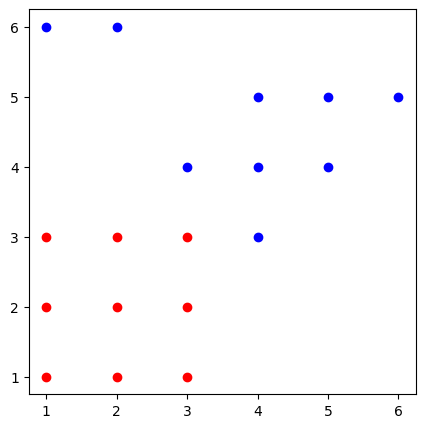

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 5))

c0 = df[df.c==0][Xcols]
c1 = df[df.c==1][Xcols]

ax.scatter(c0.x,c0.y,color="red")
ax.scatter(c1.x,c1.y,color="blue")

Dibujamos todo junto

In [4]:
from sklearn.neighbors import KNeighborsClassifier

k=3 # 7
knn = KNeighborsClassifier(n_neighbors=k)
X = df[Xcols]
y = df[ycol]
knn.fit(X,y)  # queremos predecir c a partir de x,y

# aplicarlo a dos puntos
puntos = [[1,5]]
cpuntos = knn.predict(puntos)
cpuntos

E:\instalados\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Para obtener los puntos más cercanos

In [5]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors().fit(X)
[d] = nn.kneighbors(puntos, k, return_distance=False)
d

E:\instalados\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([16, 17,  6], dtype=int64)

In [6]:
cercanos = df.iloc[d,:2]
cercanos

,x,y
16,1,6
17,2,6
6,1,3


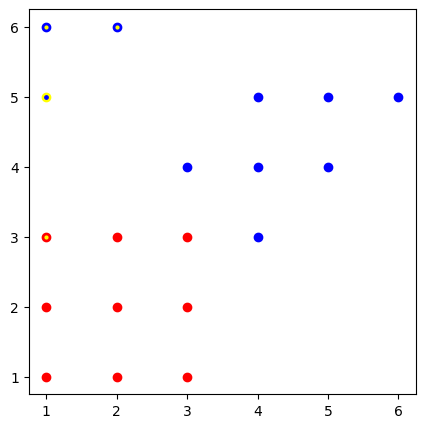

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

c0 = df[df.c==0]
c1 = df[df.c==1]

ax.scatter(c0.x,c0.y,color="red")
ax.scatter(c1.x,c1.y,color="blue")

ax.scatter([puntos[0][0]], [puntos[0][1]], color="yellow")
ax.scatter([puntos[0][0]], [puntos[0][1]], color="red" if cpuntos[0]==0 else "blue", s=6)

ax.scatter(cercanos.x,cercanos.y,color="yellow",s=4)
plt.show()